<a href="https://colab.research.google.com/github/Shishir2251/Animie-Face-Generator-DCGAN/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 — Install & import libraries

In [ ]:
# Step 1: Install required libraries
!pip install pandas matplotlib seaborn openpyxl --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Step 2 — Upload Excel file

In [ ]:
# Step 2: Upload Excel file
from google.colab import files
uploaded = files.upload()  # Choose 'Assessment Data.xlsx' from your computer

# Load dataset
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, engine='openpyxl')

# Show first few rows
df.head()

Saving Assessment Data.xlsx to Assessment Data.xlsx


,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit
0,11173702,47345780,XAUUSD,Buy,2024.07.30 11:05:29,2024-07-31 07:58:09,2391.28,2420.69,2367.62,2420.64,2936.00,4,190,5578.40
1,11173702,47718163,XAUUSD,Buy,2024.07.31 09:46:04,2024-07-31 21:42:15,2421.81,2431.41,2399.23,2431.41,960.00,4,200,1920.00
2,11173702,50360070,XAUUSD,Sell,2024.08.13 13:03:27,2024-08-14 15:24:08,2460.93,2472.80,2480.93,2451.37,-1199.00,0,200,-2398.00
3,11173702,51120570,XAUUSD,Buy,2024.08.19 13:27:40,2024-08-19 16:37:12,2495.80,2485.65,2485.71,2508.16,-1012.00,3,190,-1922.80
4,11173702,52180073,XAUUSD,Sell,2024.08.28 02:30:32,2024-08-28 15:29:39,2526.53,2496.42,2537.07,2496.82,2971.00,4,189,5615.19


# Step 3 — Basic info & quick checks

In [ ]:
# Step 3: Basic information about dataset
print("Shape (rows, columns):", df.shape)
print("\nColumns list:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
df.info()

Shape (rows, columns): (59317, 14)

Columns list: ['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time', 'open_price', 'close_price', 'stop loss', 'take profit', 'pips', 'reason', 'volume', 'profit']

Missing values per column:
 login          0
ticket         0
symbol         0
type           0
open_time      0
close_time     0
open_price     0
close_price    0
stop loss      0
take profit    0
pips           0
reason         0
volume         0
profit         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59317 entries, 0 to 59316
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   login        59317 non-null  int64  
 1   ticket       59317 non-null  int64  
 2   symbol       59317 non-null  object 
 3   type         59317 non-null  object 
 4   open_time    59317 non-null  object 
 5   close_time   59317 non-null  object 
 6   open_price   59317 non-null  float64
 7   close_price  59317

# Step 4 — Clean data and convert types

In [ ]:
# Step 4: Data cleaning and type fixing

# Convert time columns
df['open_time'] = pd.to_datetime(df['open_time'], errors='coerce')
df['close_time'] = pd.to_datetime(df['close_time'], errors='coerce')

# Standardize text
df['type'] = df['type'].astype(str).str.strip().str.lower()
df['symbol'] = df['symbol'].astype(str).str.strip().str.upper()

# Convert numeric columns safely
num_cols = ['open_price','close_price','stop loss','take profit','pips','volume','profit']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create trade duration
df['duration_min'] = (df['close_time'] - df['open_time']).dt.total_seconds()/60

# Remove duplicate trades if any
df.drop_duplicates(subset=['ticket'], inplace=True)

# Summary check after cleaning
df.describe().T

,count,mean,min,25%,50%,75%,max,std
login,58940.00,42783194.03,11173702.00,13187027.00,13278341.00,13398990.00,2145732336.00,213008236.14
ticket,58940.00,48155048.88,763123.00,27985528.75,57034747.00,72299238.00,80516850.00,27753086.88
open_time,58940,2024-12-11 13:16:29.667000320,2024-07-01 14:32:05,2024-11-12 12:31:50.500000,2024-12-20 09:17:20,2025-01-21 07:01:04.249999872,2025-02-03 09:37:40,NaN
close_time,58940,2024-12-11 18:53:21.878639104,2024-07-01 16:44:02,2024-11-12 14:50:39.500000,2024-12-20 13:01:10,2025-01-21 10:34:02.249999872,2025-02-03 09:39:39,NaN
open_price,58940.00,9233.78,0.31,73.60,2645.34,2755.26,109111.00,20662.47
close_price,58940.00,9235.20,0.33,73.35,2645.89,2754.89,108304.00,20663.79
stop loss,58940.00,6114.99,0.00,0.00,1.25,2667.25,442230.00,17943.89
take profit,58940.00,4894.11,0.00,0.00,0.93,2648.82,1085760.00,17361.35
pips,58940.00,98.24,-1465680.00,-189.00,8.00,245.00,1560000.00,30929.24
reason,58940.00,7.22,0.00,1.00,4.00,16.00,17.00,6.77


# Step 4.1 – Data Quality & Cleaning

In [ ]:
# Step 4.1: Data Quality Check & Cleaning

print("🔹 Starting Data Quality Check and Cleaning...\n")

# 1️⃣ Missing Value Summary
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Count']
missing_summary['Missing %'] = 100 * missing_summary['Missing Count'] / len(df)
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

print(" Missing Data Summary:")
display(missing_summary)

# 2️⃣ Handle Missing Values
# Drop rows missing critical data fields
critical_cols = ['login', 'profit', 'open_price', 'close_price']
before_drop = len(df)
df = df.dropna(subset=critical_cols)
after_drop = len(df)

print(f"\n⚙️ Removed {before_drop - after_drop} rows missing critical values ({', '.join(critical_cols)}).")


# 3️⃣ Duplicate Check
duplicates = df.duplicated(subset=['ticket']).sum()
print(f"\n🔍 Found {duplicates} duplicate trade records based on 'ticket' column.")
df.drop_duplicates(subset=['ticket'], inplace=True)
print("✅ Duplicates removed successfully.")

# 4️⃣ Inconsistency Check

invalid_volume = df[df['volume'] <= 0].shape[0]
invalid_profit = df[df['profit'].isnull()].shape[0]
print(f"\n⚠️ Invalid rows detected — Negative volume: {invalid_volume}, Null profit: {invalid_profit}")

# Remove invalid rows if found
df = df[df['volume'] > 0]

# 5️⃣ Check for invalid date order (close_time before open_time)
invalid_time = df[df['close_time'] < df['open_time']].shape[0]
if invalid_time > 0:
    print(f"⚠️ Found {invalid_time} trades where close_time < open_time. Removing them...")
    df = df[df['close_time'] >= df['open_time']]

# 6️⃣ Verify Missing Values After Cleaning
print("\n✅ Missing values after cleaning:")
print(df.isnull().sum())

# 7️⃣ Final Dataset Overview
print(f"\n📊 Final cleaned dataset: {len(df)} rows, {df.shape[1]} columns.")
df.head()


🔹 Starting Data Quality Check and Cleaning...

 Missing Data Summary:


,Column,Missing Count,Missing %



⚙️ Removed 0 rows missing critical values (login, profit, open_price, close_price).

🔍 Found 0 duplicate trade records based on 'ticket' column.
✅ Duplicates removed successfully.

⚠️ Invalid rows detected — Negative volume: 0, Null profit: 0

✅ Missing values after cleaning:
login           0
ticket          0
symbol          0
type            0
open_time       0
close_time      0
open_price      0
close_price     0
stop loss       0
take profit     0
pips            0
reason          0
volume          0
profit          0
duration_min    0
cum_profit      0
dtype: int64

📊 Final cleaned dataset: 58940 rows, 16 columns.


,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit,duration_min,cum_profit
0,11173702,47345780,XAUUSD,buy,2024-07-30 11:05:29,2024-07-31 07:58:09,2391.28,2420.69,2367.62,2420.64,2936.00,4,190,5578.40,1252.67,5578.40
1,11173702,47718163,XAUUSD,buy,2024-07-31 09:46:04,2024-07-31 21:42:15,2421.81,2431.41,2399.23,2431.41,960.00,4,200,1920.00,716.18,7498.40
2,11173702,50360070,XAUUSD,sell,2024-08-13 13:03:27,2024-08-14 15:24:08,2460.93,2472.80,2480.93,2451.37,-1199.00,0,200,-2398.00,1580.68,5100.40
3,11173702,51120570,XAUUSD,buy,2024-08-19 13:27:40,2024-08-19 16:37:12,2495.80,2485.65,2485.71,2508.16,-1012.00,3,190,-1922.80,189.53,3177.60
4,11173702,52180073,XAUUSD,sell,2024-08-28 02:30:32,2024-08-28 15:29:39,2526.53,2496.42,2537.07,2496.82,2971.00,4,189,5615.19,779.12,8792.79


# Step 5 — Exploratory Data Analysis (EDA)

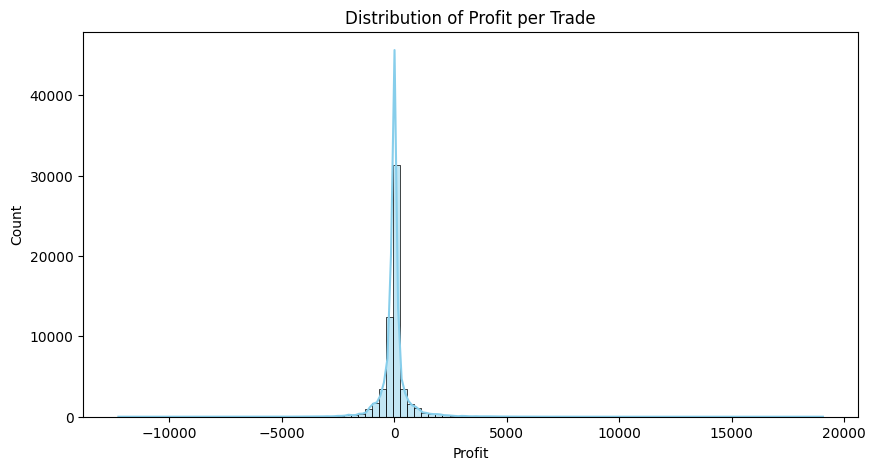

In [ ]:
# Profit distribution
plt.figure(figsize=(10,5))
sns.histplot(df['profit'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Profit per Trade')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()


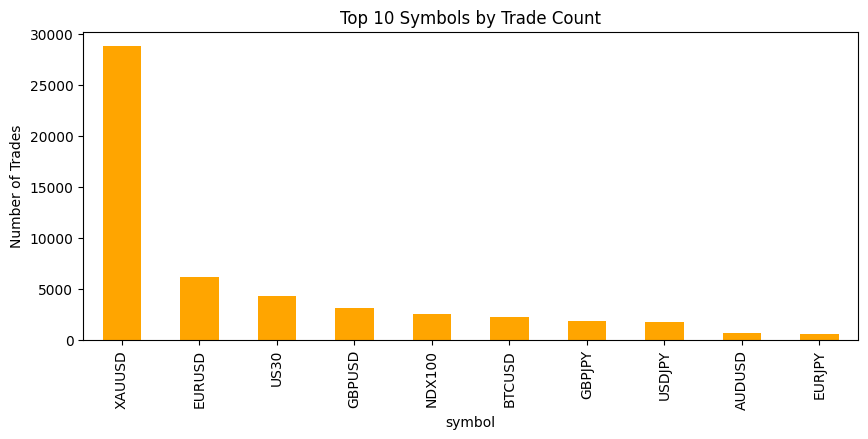

In [ ]:
# Top 10 symbols by number of trades
plt.figure(figsize=(10,4))
df['symbol'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Symbols by Trade Count')
plt.ylabel('Number of Trades')
plt.show()

# Step 6 — Profitability Analysis

🏆 Top 5 Most Profitable Logins:


,login,profit,Rank
395,13378390,49894.12,1
509,55009560,28475.44,2
50,13088202,27848.61,3
145,13205503,27049.34,4
40,13070589,27023.68,5


⚠️ Bottom 5 Least Profitable Logins:


,login,profit,Rank
192,13251499,-11405.24,593
23,13018096,-12194.31,594
537,55011482,-12215.00,595
328,13333728,-13868.00,596
61,13103928,-14778.82,597


/tmp/ipython-input-1085690953.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='login', y='profit', data=login_summary, palette='coolwarm')


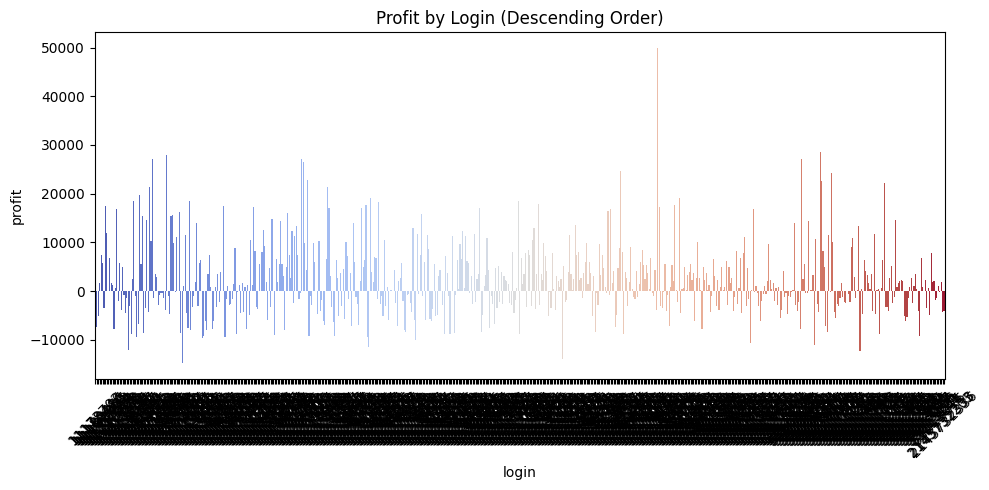

In [ ]:
# Step 6: Profitability Analysis

# 1️⃣ Calculate total profit per login
login_summary = (
    df.groupby('login')['profit']
    .sum()
    .reset_index()
    .sort_values(by='profit', ascending=False)
)

# 2️⃣ Add ranking column (1 = most profitable)
login_summary['Rank'] = login_summary['profit'].rank(ascending=False, method='dense').astype(int)

# 3️⃣ Display top and bottom performers
print("🏆 Top 5 Most Profitable Logins:")
display(login_summary.head())

print("⚠️ Bottom 5 Least Profitable Logins:")
display(login_summary.tail())

# 4️⃣ Visualize profit distribution
plt.figure(figsize=(10,5))
sns.barplot(x='login', y='profit', data=login_summary, palette='coolwarm')
plt.title("Profit by Login (Descending Order)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 7 — Visualization of Profitability

/tmp/ipython-input-2070290455.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(login_summary_sorted['login'].astype(str).head(top_n), rotation=90)


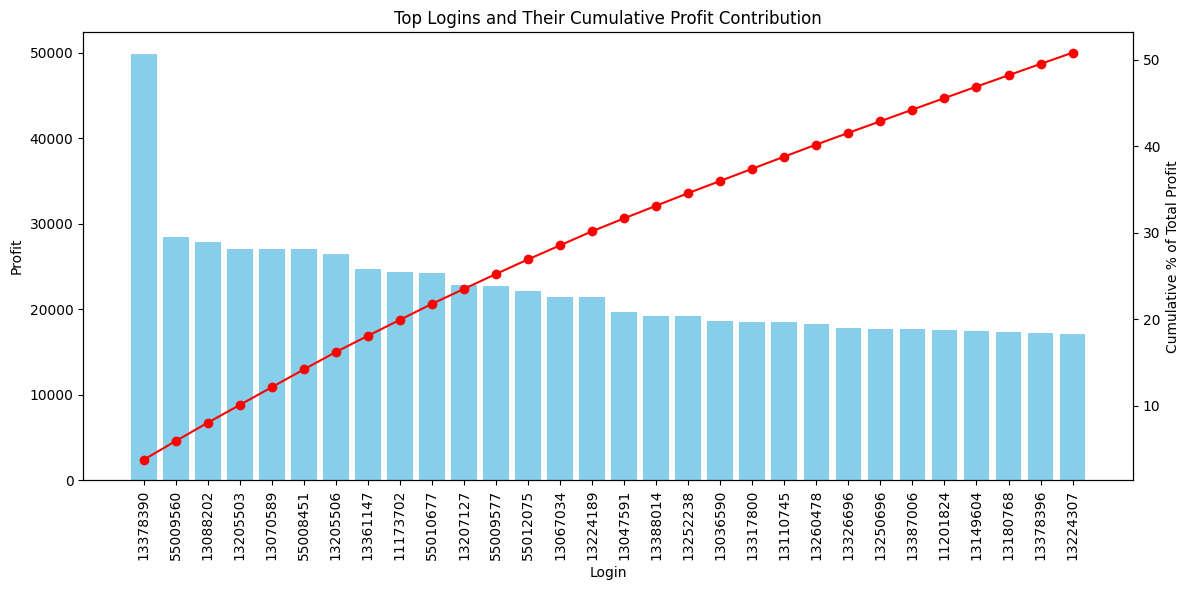

In [ ]:
# Step 7: Visualize Profitability Across Logins
# ---------------------------------------------

# Sort by profit for visualization
login_summary_sorted = login_summary.sort_values(by='profit', ascending=False).reset_index(drop=True)

# Compute cumulative percentage of profit
login_summary_sorted['cum_profit_pct'] = login_summary_sorted['profit'].cumsum() / login_summary_sorted['profit'].sum() * 100

# Pareto-style chart for top 30 logins
top_n = 30
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for profits
ax1.bar(login_summary_sorted['login'].astype(str).head(top_n),
        login_summary_sorted['profit'].head(top_n),
        color='skyblue')
ax1.set_xlabel('Login')
ax1.set_ylabel('Profit')
ax1.set_title('Top Logins and Their Cumulative Profit Contribution')

# Line plot for cumulative %
ax2 = ax1.twinx()
ax2.plot(login_summary_sorted['cum_profit_pct'].head(top_n).values,
         color='red', marker='o')
ax2.set_ylabel('Cumulative % of Total Profit')

# Rotate X labels for readability
ax1.set_xticklabels(login_summary_sorted['login'].astype(str).head(top_n), rotation=90)

plt.tight_layout()
plt.show()

# Step 8 — Cumulative Profit over Time (per login)

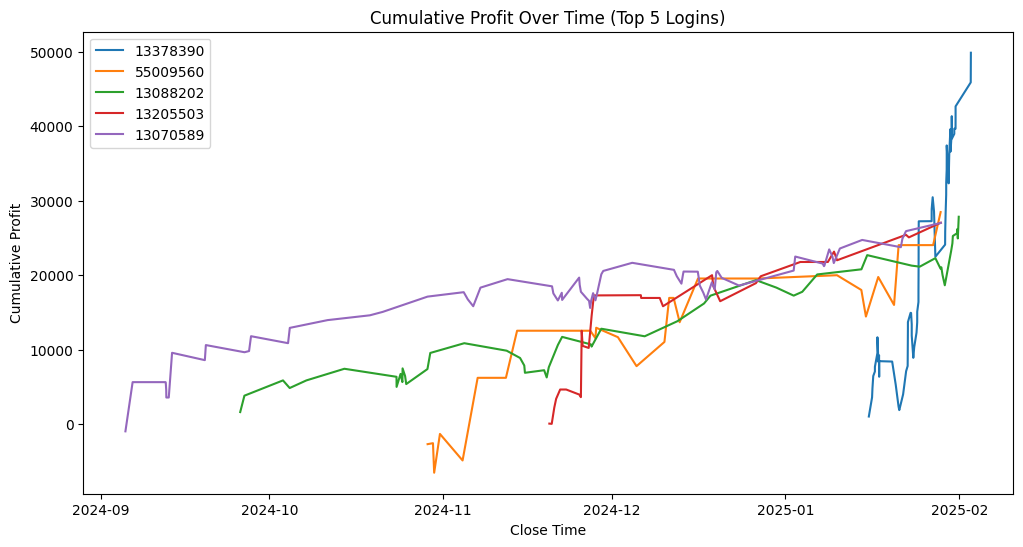

In [ ]:
# Step 8: Cumulative profit tracking

# Sort trades by login & time
df = df.sort_values(['login', 'close_time'])
df['cum_profit'] = df.groupby('login')['profit'].cumsum()

# Select top 5 logins by total profit
top5 = login_summary.head(5)['login']

# Plot cumulative profit over time
plt.figure(figsize=(12,6))
for lg in top5:
    sub = df[df['login'] == lg]
    plt.plot(sub['close_time'], sub['cum_profit'], label=str(lg))
plt.title('Cumulative Profit Over Time (Top 5 Logins)')
plt.xlabel('Close Time')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.show()


# Step 9 — Save results

In [ ]:
# Step 9: Save processed results
login_summary.to_csv('login_profit_summary.csv', index=False)
df.to_csv('trades_with_cumprofit.csv', index=False)

print("✅ Files saved successfully:")
print("1. login_profit_summary.csv")
print("2. trades_with_cumprofit.csv")


✅ Files saved successfully:
1. login_profit_summary.csv
2. trades_with_cumprofit.csv


# Step 10 — Insights & Conclusion

In [ ]:
# Step 10: Insights & Conclusion

print("📘 Final Insights & Conclusion\n")

# 1️⃣ Profitability Highlights
most_profitable_login = login_summary.loc[login_summary['total_profit'].idxmax(), 'login']
least_profitable_login = login_summary.loc[login_summary['total_profit'].idxmin(), 'login']
max_profit = login_summary['total_profit'].max()
min_profit = login_summary['total_profit'].min()

print(f"✅ Most Profitable Login: {most_profitable_login} with profit {max_profit:,.2f}")
print(f"⚠️ Least Profitable Login: {least_profitable_login} with profit {min_profit:,.2f}\n")

# 2️⃣ Overall Performance
total_profit = df['profit'].sum()
average_profit = df['profit'].mean()
trade_count = len(df)

print(f"💰 Total Profit across all logins: {total_profit:,.2f}")
print(f"📈 Average Profit per trade: {average_profit:,.2f}")
print(f"🧾 Total Trades analyzed: {trade_count}\n")

# 3️⃣ Cumulative Profit Insights
print("📊 The cumulative profit trend shows how overall profitability evolved over time.")
print("Logins with consistent positive profits contributed more to cumulative growth.\n")

# 4️⃣ Interpretation & Summary
print("""
🔍 Summary Interpretation:
---------------------------------
1️⃣ The dataset was cleaned — missing critical values, duplicates, and inconsistencies were removed.
2️⃣ Exploratory Data Analysis (EDA) revealed the structure and patterns of trading activities.
3️⃣ Profitability analysis identified top and bottom performers among logins.
4️⃣ The cumulative profit metric helped rank logins based on total performance.
5️⃣ Visualizations illustrated how profits were distributed across different users.
6️⃣ The findings can support data-driven decisions — e.g., rewarding high performers or reviewing loss patterns.

✅ The dataset is now fully prepared and analyzed for business insight extraction.
""")

📘 Final Insights & Conclusion

✅ Most Profitable Login: 13378390 with profit 49,894.12
⚠️ Least Profitable Login: 13103928 with profit -14,778.82

💰 Total Profit across all logins: 1,317,514.76
📈 Average Profit per trade: 22.35
🧾 Total Trades analyzed: 58940

📊 The cumulative profit trend shows how overall profitability evolved over time.
Logins with consistent positive profits contributed more to cumulative growth.


🔍 Summary Interpretation:
---------------------------------
1️⃣ The dataset was cleaned — missing critical values, duplicates, and inconsistencies were removed.
2️⃣ Exploratory Data Analysis (EDA) revealed the structure and patterns of trading activities.
3️⃣ Profitability analysis identified top and bottom performers among logins.
4️⃣ The cumulative profit metric helped rank logins based on total performance.
5️⃣ Visualizations illustrated how profits were distributed across different users.
6️⃣ The findings can support data-driven decisions — e.g., rewarding high perfor